In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Importing dataset is in a CSV file
df = pd.read_csv(r'C:\Users\user\Downloads\archive\climate_change_data.csv')


In [4]:
# checking few rows
df.head()


,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [43]:
#  Data Type and summary statistics

In [17]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.3+ KB


,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664


In [44]:
# Checking for missing Data 
df.isnull().sum()


Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

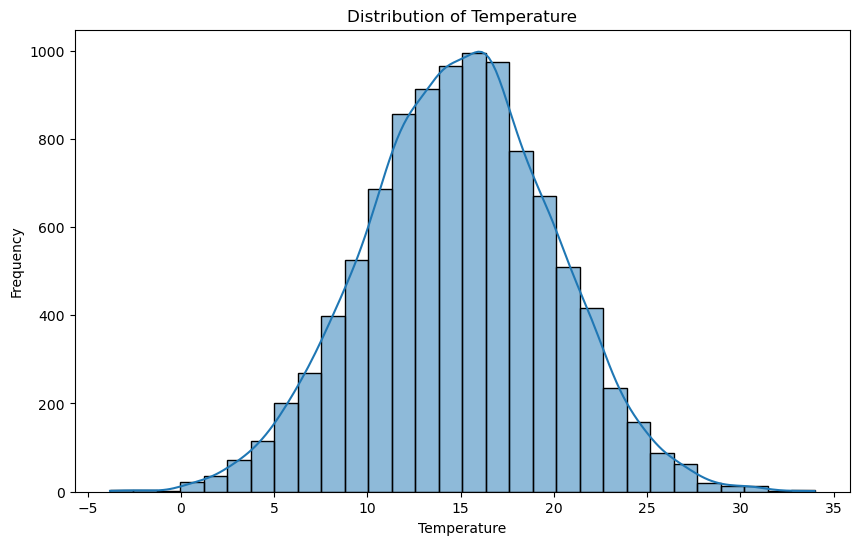

In [45]:
# Histograms for numerical variables like Temperature, CO2 Emissions, Sea Level Rise, etc., to understand their distributions.
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature'], bins=30, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


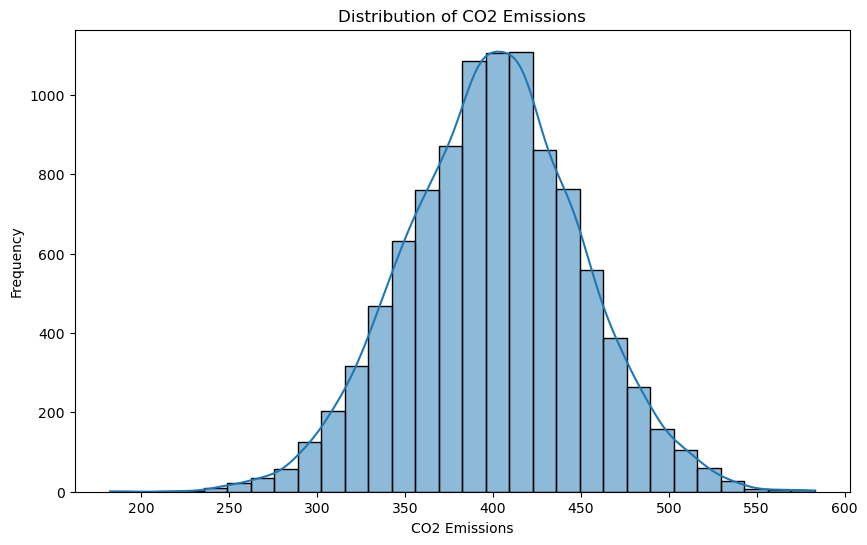

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CO2 Emissions'], bins=30, kde=True)
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions')
plt.ylabel('Frequency')
plt.show()


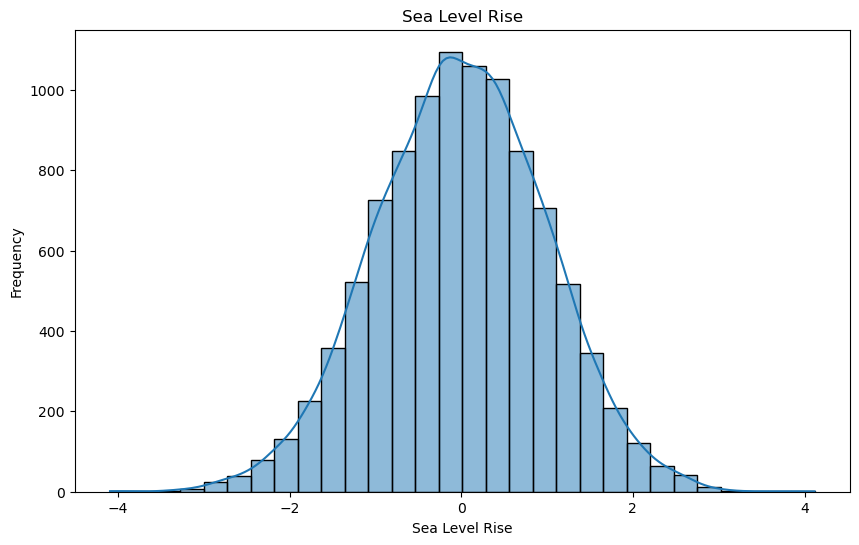

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sea Level Rise'], bins=30, kde=True)
plt.title('Sea Level Rise')
plt.xlabel('Sea Level Rise')
plt.ylabel('Frequency')
plt.show()


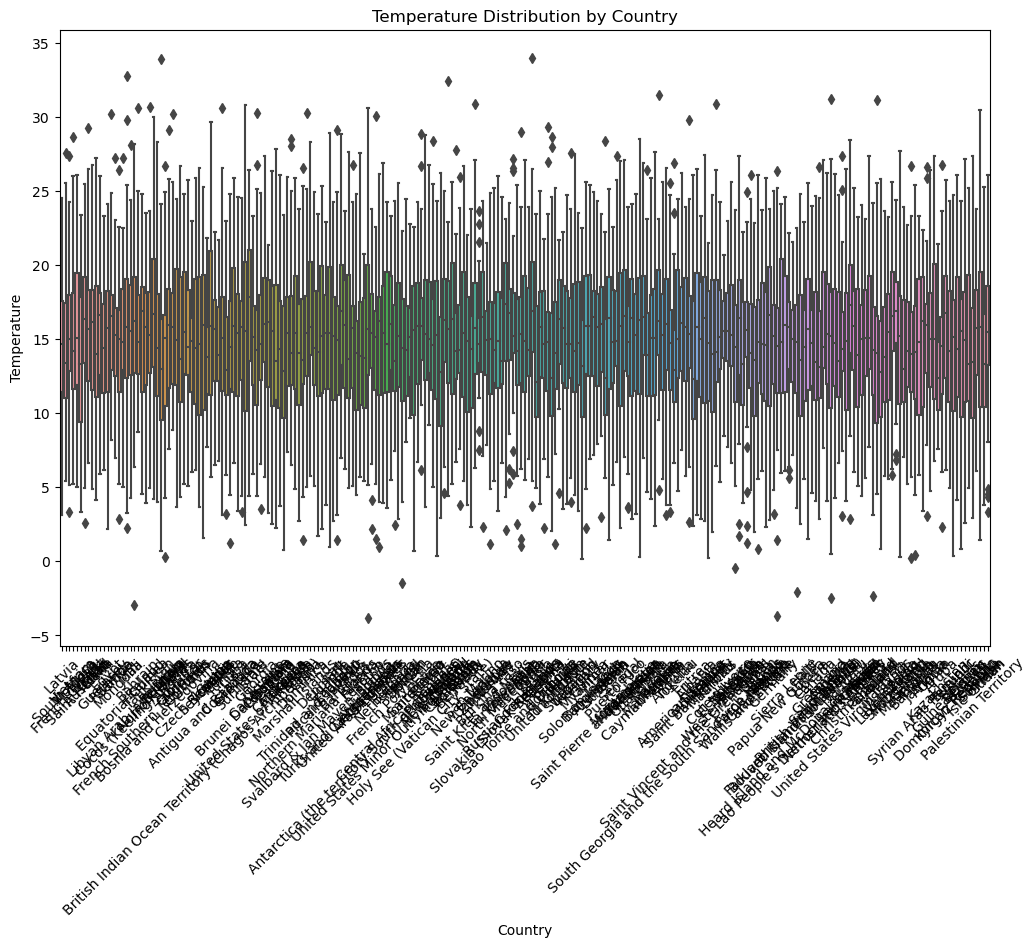

In [22]:
#Box plots to identify outliers and compare distributions across different countries or regions.
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Temperature', data=df)
plt.title('Temperature Distribution by Country')
plt.xticks(rotation=45)
plt.show()


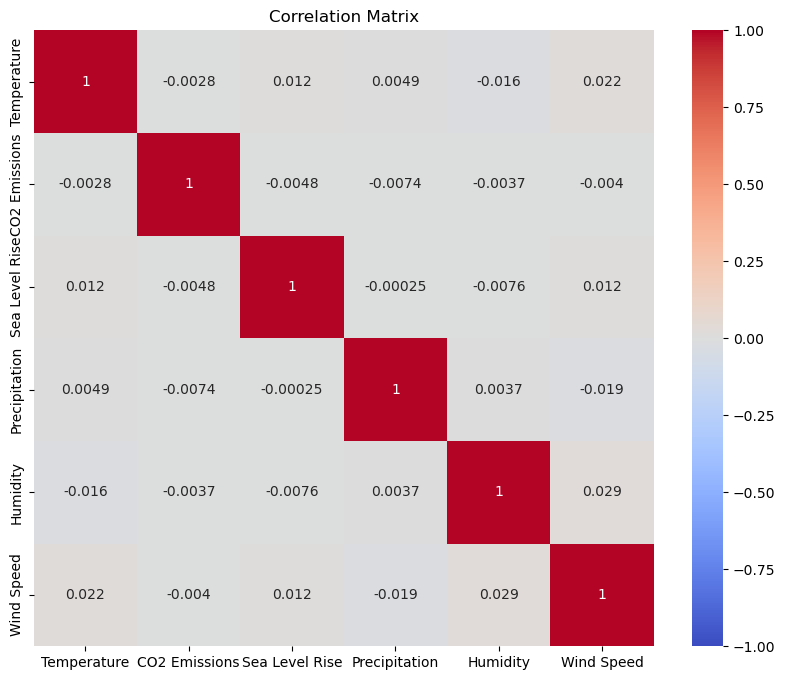

In [23]:
#Correlation matrix to examine relationships between variables like Temperature, CO2 Emissions, Sea Level Rise
corr_matrix = df[['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


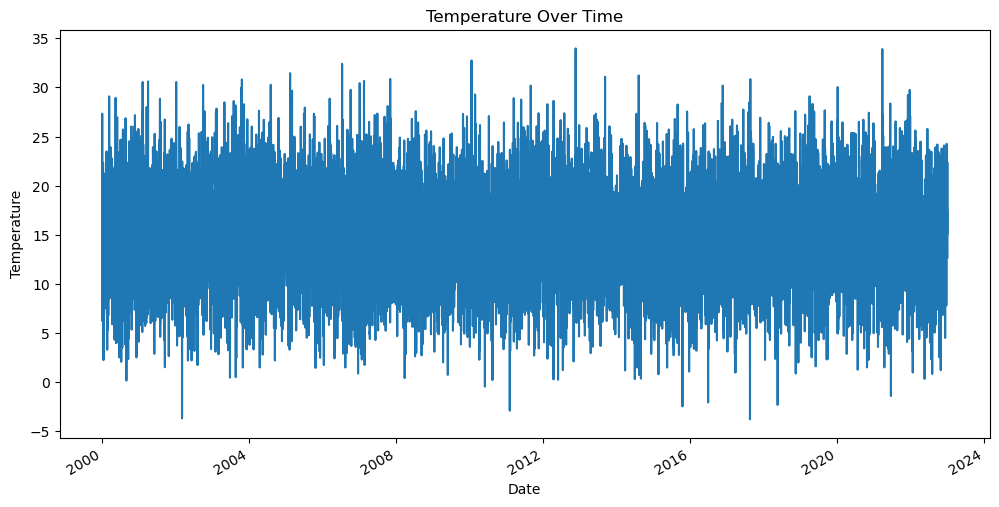

In [24]:
# time series data, visualize trends over time for variables like Temperature, CO2 Emissions

df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime format
df.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
df['Temperature'].plot()
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()


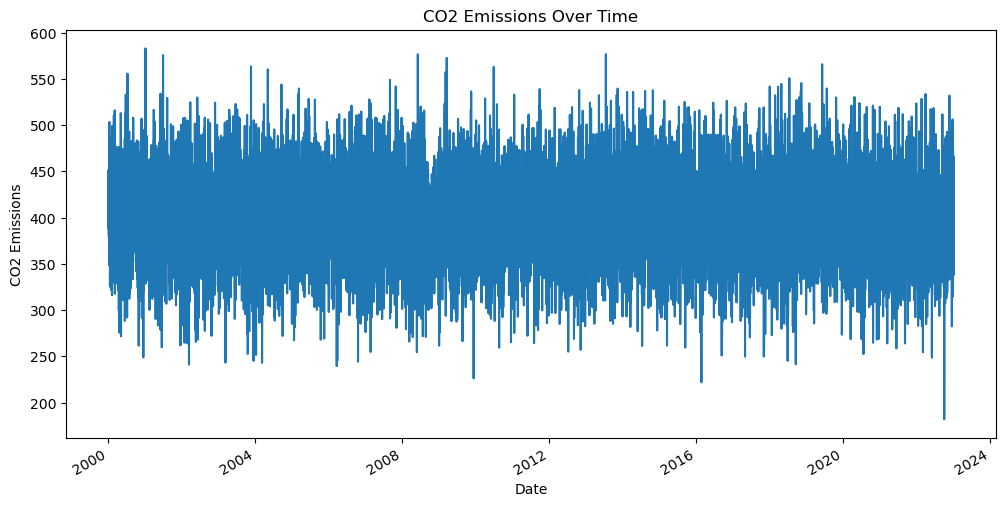

In [46]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime format
df.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
df['CO2 Emissions'].plot()
plt.title('CO2 Emissions Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')
plt.show()



In [48]:
%pip install geopandas --user

C:\Users\user\AppData\Local\Temp\ipykernel_18360\3819638755.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


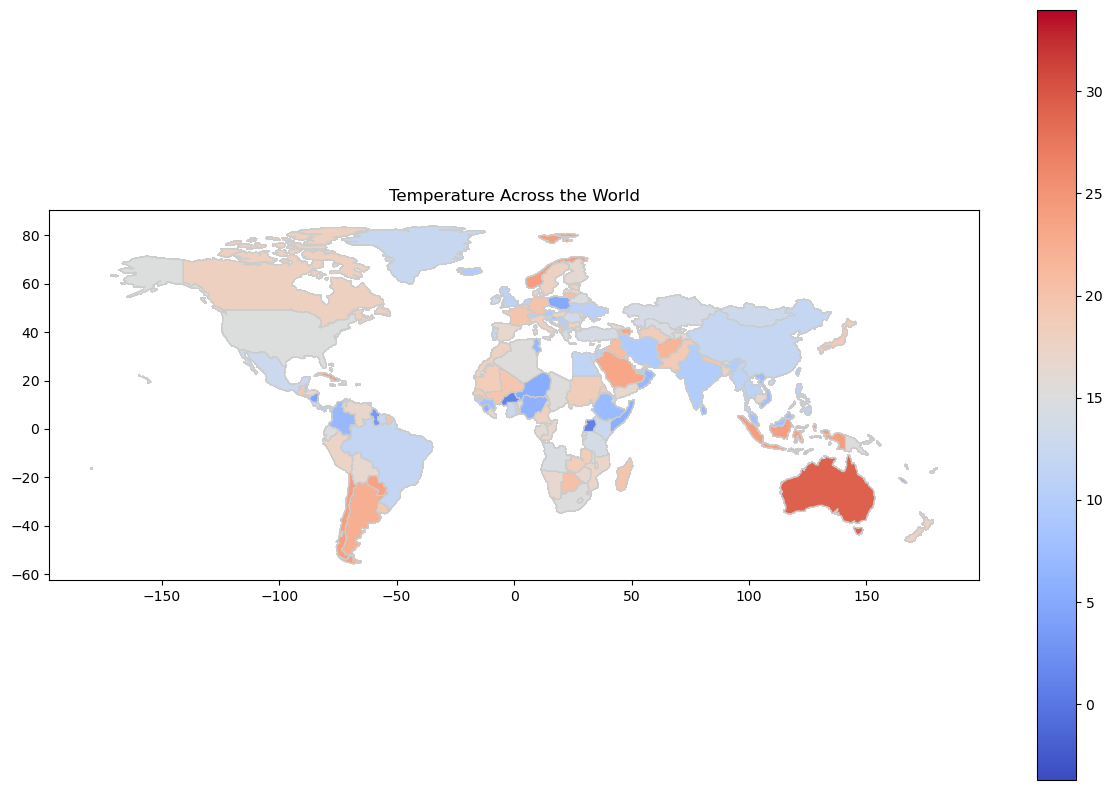

In [5]:
# Map visualization to explore spatial patterns in variables across different locations or countries.
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est > 0) & (world.name != "Antarctica")]

# Merge your data with geopandas world data
merged = world.merge(df, left_on='name', right_on='Country', how='inner')

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))
merged.plot(column='Temperature', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Temperature Across the World')
plt.show()
